In this notebook, I am going to do some EDA and visualization on vaccine dataset.

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [15]:
vaccine=pd.read_csv('../clean_data/vaccine_population.csv')

In [45]:
vaccine.shape

(52, 11)

In [16]:
vaccine.head()

,jurisdiction,2019_population,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,doses_allocated_01_25,total_first_allocation
0,Alabama,4903185,Region 4,40950,113550,67125,58250,58350,60825,60825,459875
1,Alaska,731545,Region 10,35100,26800,0,52900,0,0,0,114800
2,Arizona,7278717,Region 9,58500,161325,94925,83025,83225,86300,86300,653600
3,Arkansas,3017804,Region 6,25350,69625,41100,36125,36225,37125,37125,282675
4,California,39512223,Region 9,327600,905625,529675,463450,465325,485800,485800,3663275


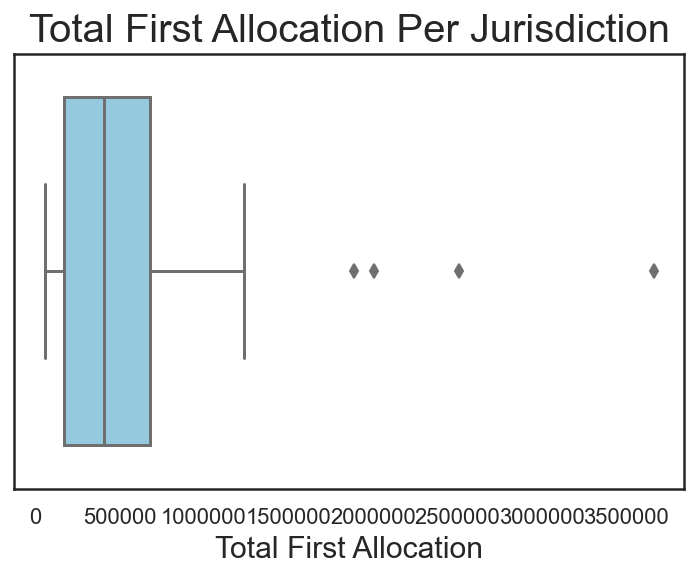

In [17]:
sns.boxplot(x=vaccine['total_first_allocation'],color='skyblue')
plt.ticklabel_format(style='plain',axis='x')
plt.title('Total First Allocation Per Jurisdiction', size=20)
plt.xlabel('Total First Allocation',size=15);

# there are 3 jurisdictions has way more allocations than other jurisdiction

In [18]:
vaccine.sort_values(by=['total_first_allocation'], ascending=False)[:4]

# California has the most allocation, then it's Texas, Florida and New York

,jurisdiction,2019_population,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,doses_allocated_01_25,total_first_allocation
4,California,39512223,Region 9,327600,905625,529675,463450,465325,485800,485800,3663275
43,Texas,28995881,Region 6,224250,620400,362875,317425,319000,332850,332850,2509650
9,Florida,21477737,Region 4,179400,495625,289925,253350,254825,266100,266100,2005325
32,New York,19453561,Region 2,169650,466125,273650,239025,239525,250400,250400,1888775


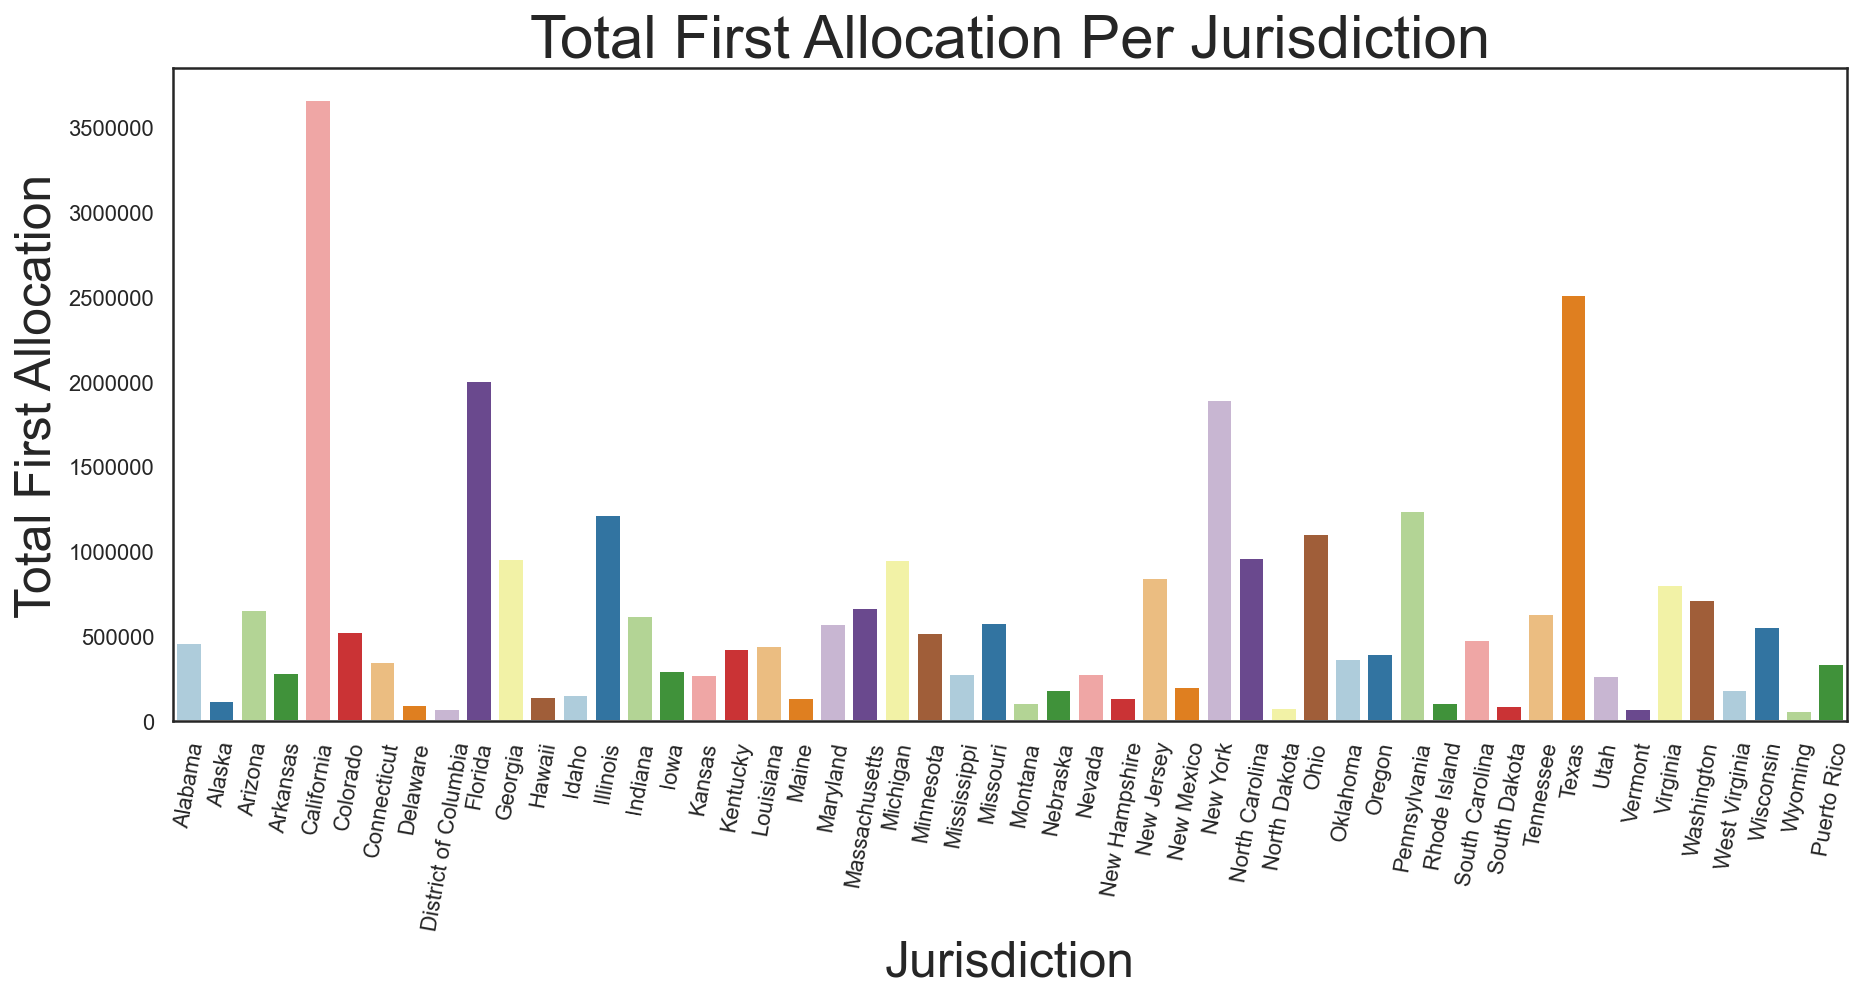

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(data=vaccine,y=vaccine['total_first_allocation'],x=vaccine['jurisdiction'],
            palette='Paired')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel("Jurisdiction",size=25)
plt.ylabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30)

plt.xticks(rotation=80);

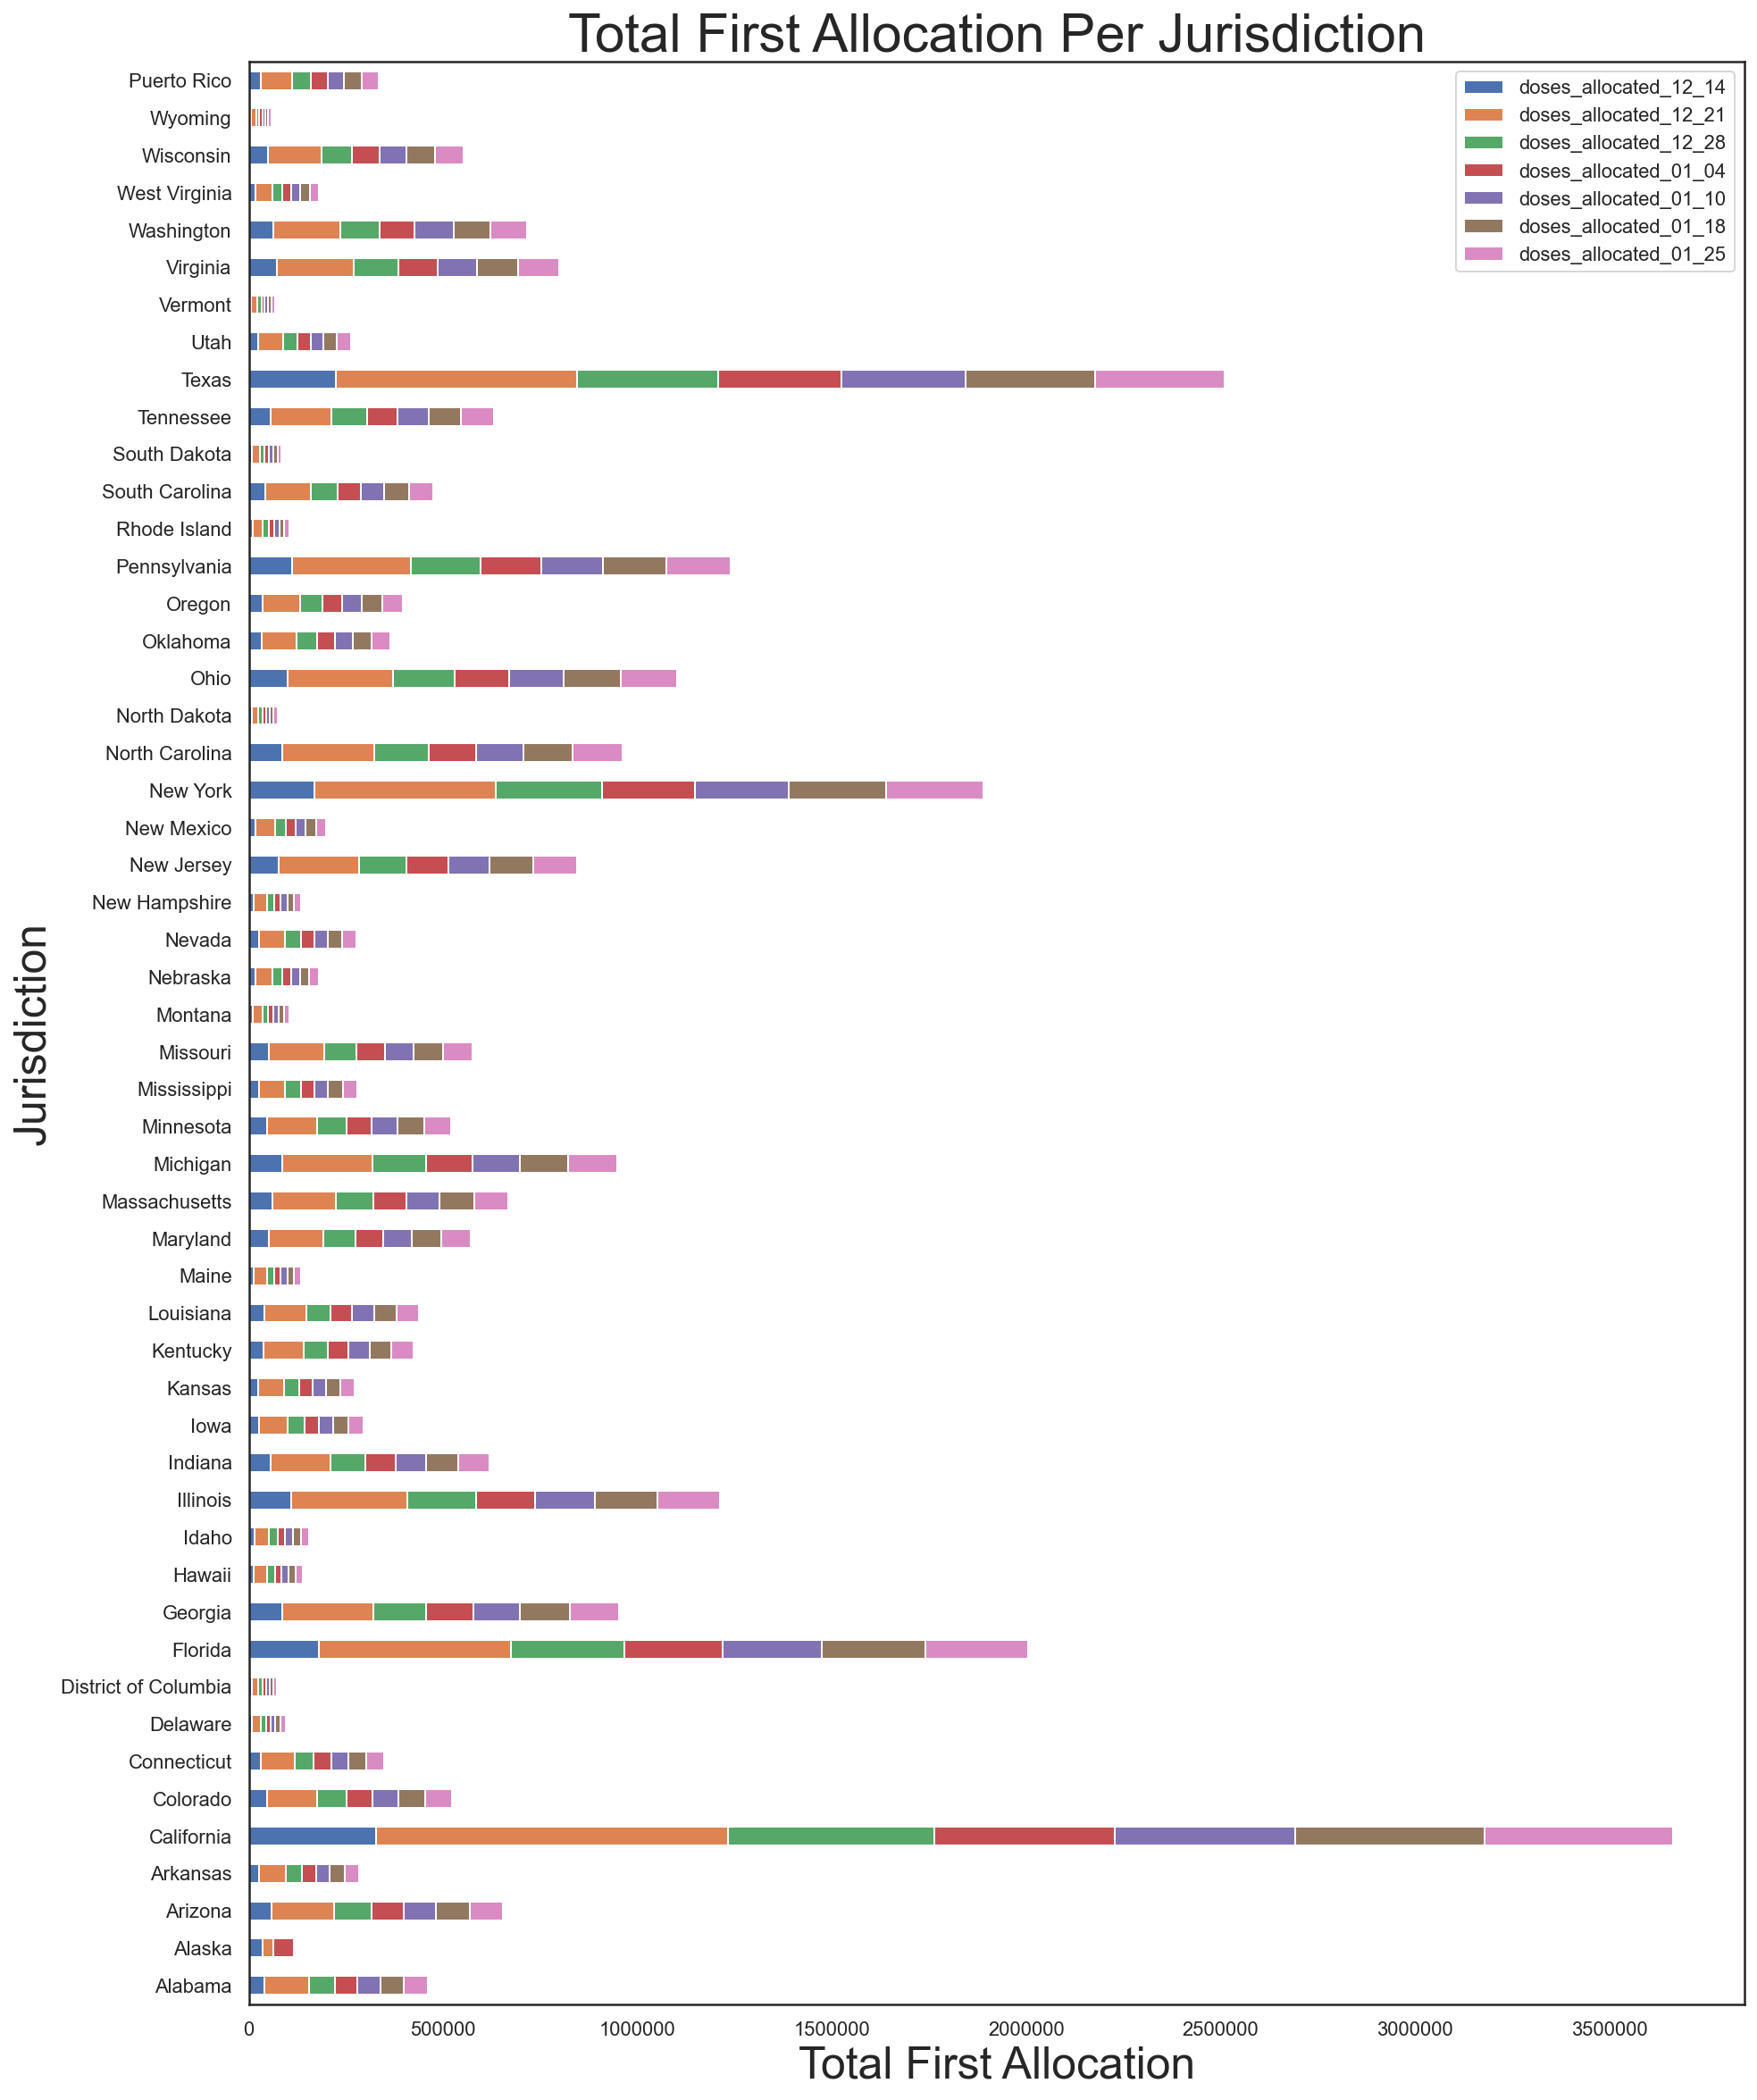

In [24]:
sns.set(style='white')

ax=vaccine.drop(['total_first_allocation','2019_population'],axis=1).\
plot.barh(stacked=True,figsize=(15,20))

plt.ticklabel_format(style='plain',axis='x')
ax.set_yticklabels(vaccine.jurisdiction)
plt.ylabel("Jurisdiction",size=25)
plt.xlabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30);


In [27]:
vaccine_sort=vaccine.sort_values(by=['total_first_allocation'], 
                                 ascending=False).drop(columns=['2019_population'])
vaccine_sort.head()

,jurisdiction,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,doses_allocated_01_25,total_first_allocation
4,California,Region 9,327600,905625,529675,463450,465325,485800,485800,3663275
43,Texas,Region 6,224250,620400,362875,317425,319000,332850,332850,2509650
9,Florida,Region 4,179400,495625,289925,253350,254825,266100,266100,2005325
32,New York,Region 2,169650,466125,273650,239025,239525,250400,250400,1888775
38,Pennsylvania,Region 3,111150,305375,179600,156875,157175,164000,164000,1238175


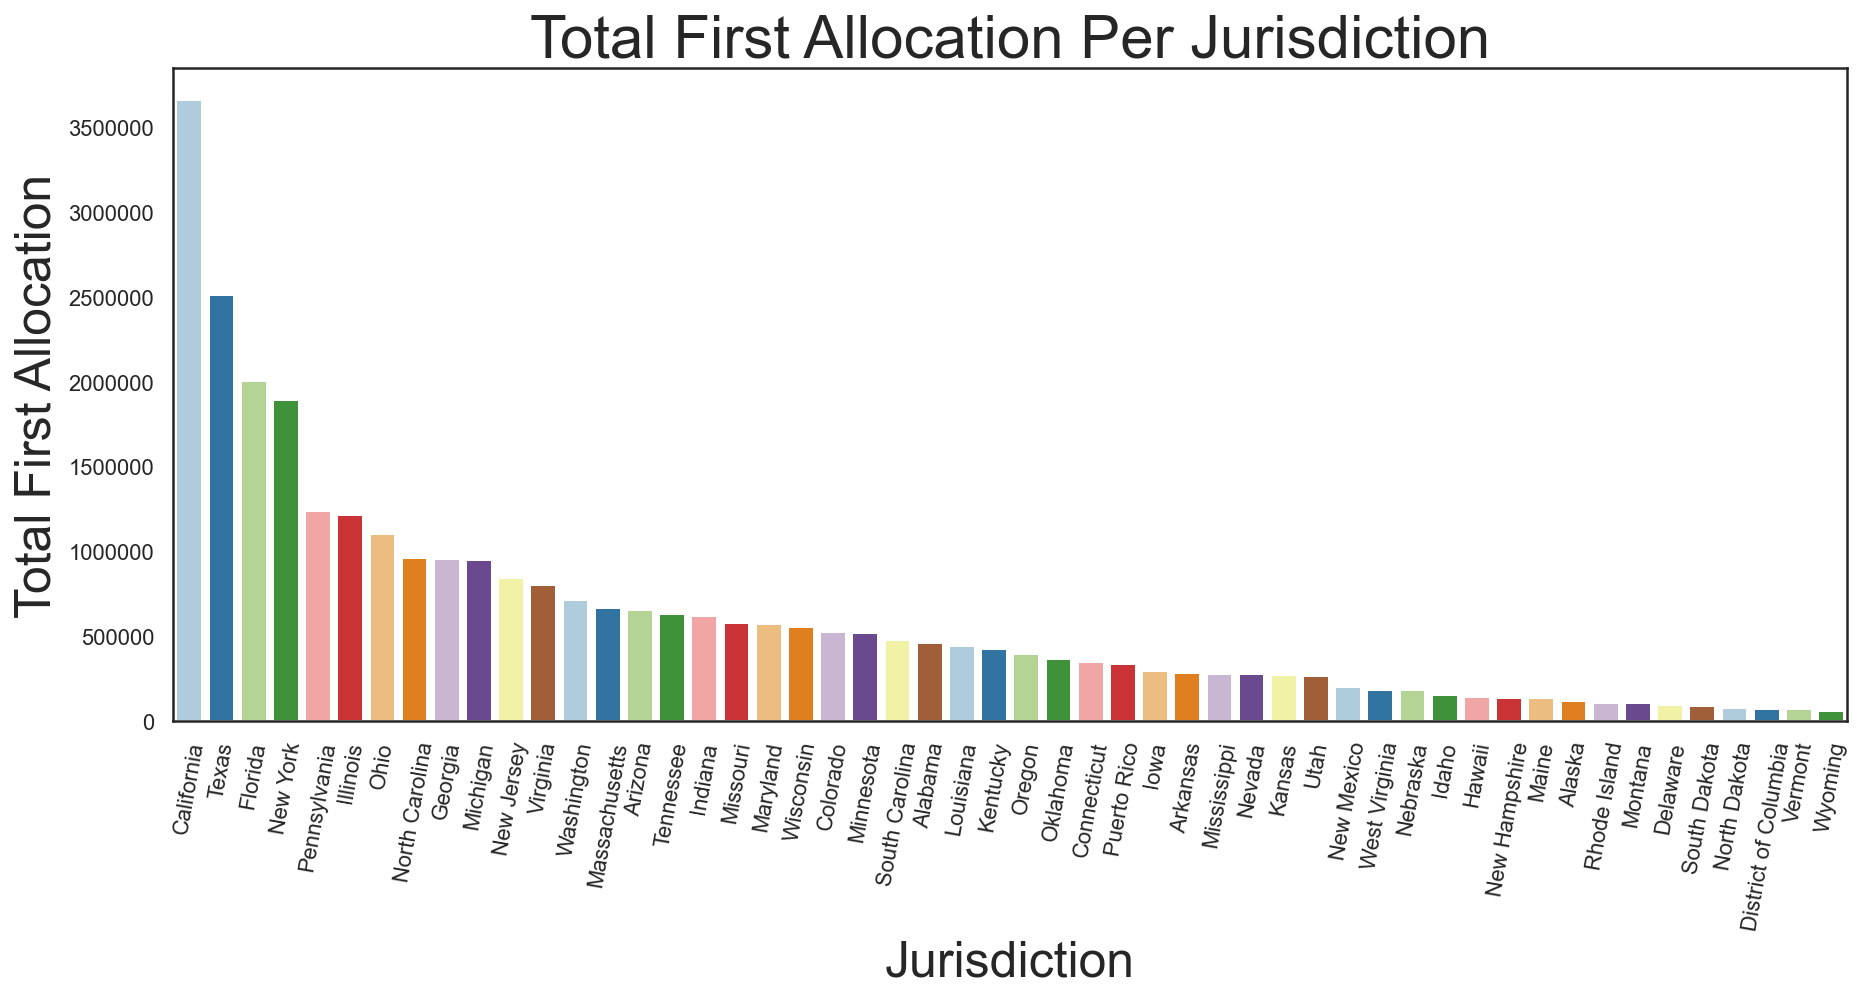

In [52]:
plt.figure(figsize=(15,6))
sns.barplot(data=vaccine_sort,
            y=vaccine_sort['total_first_allocation'],x=vaccine_sort['jurisdiction'],
            palette='Paired')#,order=vaccine_sort.jurisdiction)
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel("Jurisdiction",size=25)
plt.ylabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30)

plt.xticks(rotation=80);

In [29]:
vaccine_sort_no_total=vaccine.sort_values(by=['total_first_allocation'], ascending=True).drop(['total_first_allocation','2019_population'],axis=1)
vaccine_sort_no_total=vaccine_sort_no_total.set_index('jurisdiction')

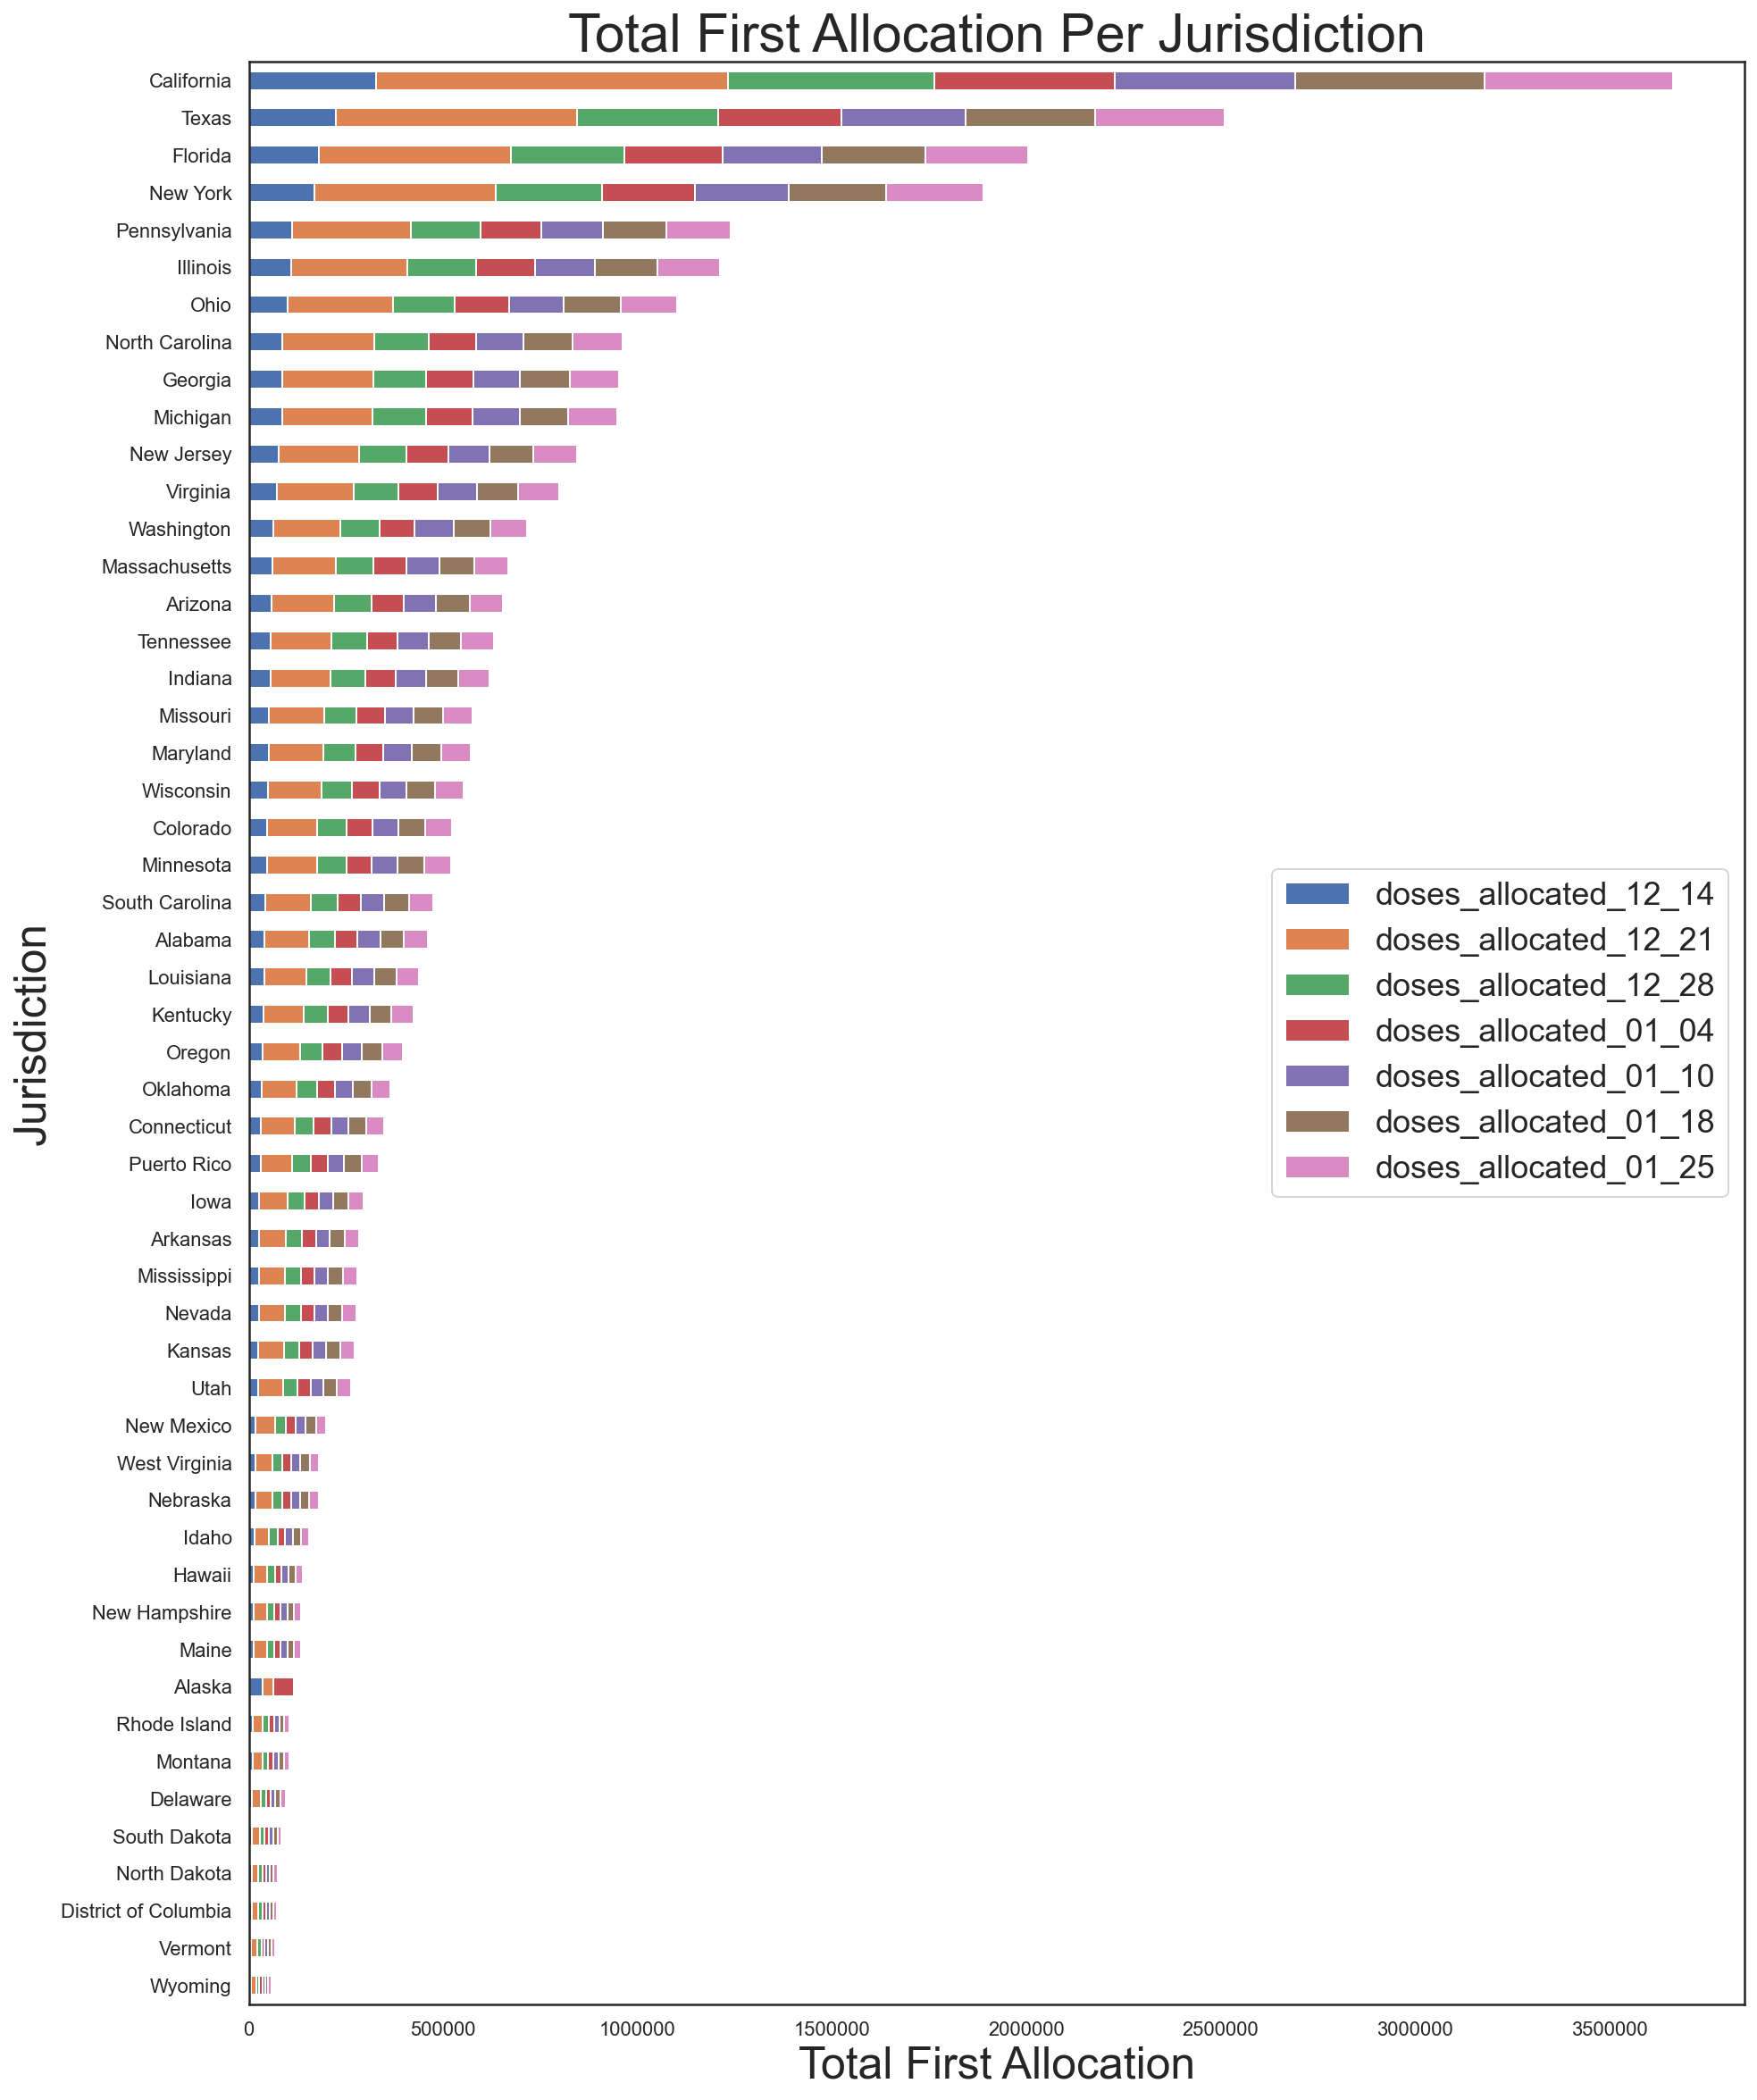

In [30]:
sns.set(style='white')
ax=vaccine_sort_no_total.plot(kind='barh',stacked=True,figsize=(15,20))
plt.ticklabel_format(style='plain',axis='x')
ax.set_yticklabels(vaccine_sort_no_total.index)
plt.ylabel("Jurisdiction",size=25)
plt.xlabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30)
plt.legend(fontsize=18,loc='center right');

# add population into graphies

In [33]:
vaccine.tail()

,jurisdiction,2019_population,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,doses_allocated_01_25,total_first_allocation
47,Washington,7614893,Region 10,62400,172850,101825,88950,101825,93300,93300,714450
48,West Virginia,1792147,Region 3,16575,44300,25925,22900,23000,23600,23600,179900
49,Wisconsin,5822434,Region 5,49725,136100,79750,69800,70000,73750,73750,552875
50,Wyoming,578759,Region 8,4875,13900,8375,7400,7400,7600,7600,57150
51,Puerto Rico,3193694,Region 2,30225,81850,48200,42250,42350,44325,44325,333525


In [40]:
# make a dataframe with only the state, population and total allocation

state_pop_vac=vaccine[['jurisdiction','2019_population','total_first_allocation']].copy()
state_pop_vac.head()

In [46]:
df = pd.melt(state_pop_vac,id_vars='jurisdiction', var_name='pop_vac',value_name='data')
df.head()

,jurisdiction,pop_vac,data
0,Alabama,2019_population,4903185
1,Alaska,2019_population,731545
2,Arizona,2019_population,7278717
3,Arkansas,2019_population,3017804
4,California,2019_population,39512223


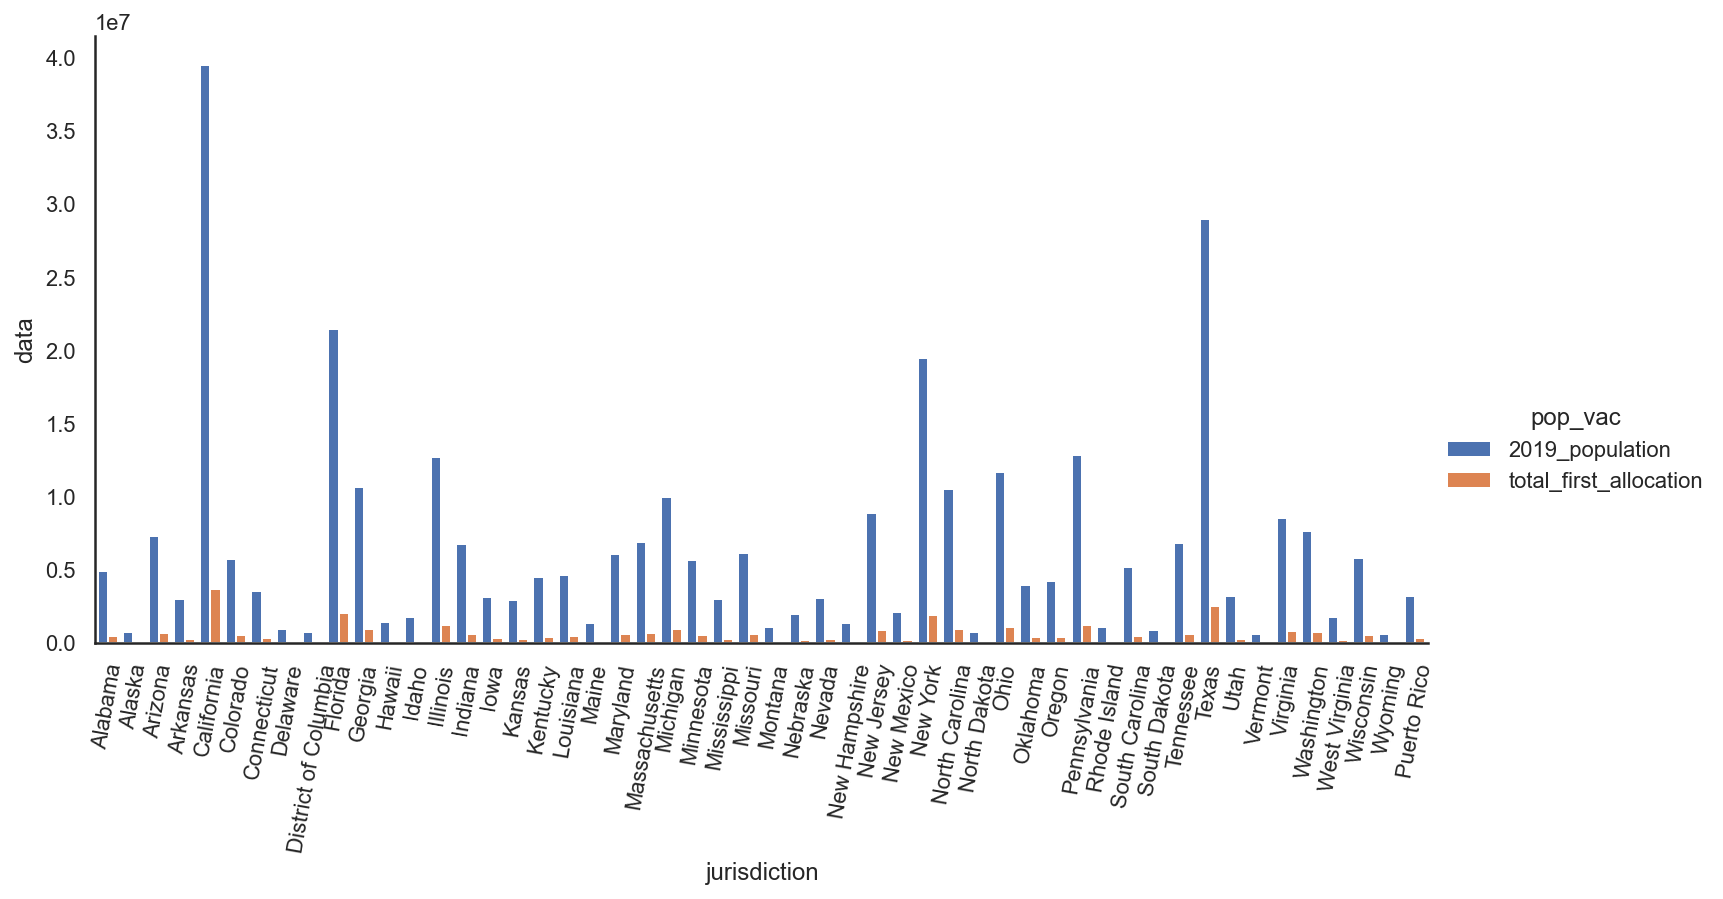

In [57]:
g = sns.catplot(x='jurisdiction',y='data',hue='pop_vac',data=df,
                saturation=1,kind='bar',ci=None,height=5, aspect=2)
plt.xticks(rotation=80);

# putting the population and alloction on the same scale is a bad idea

In [61]:
no_total_al=vaccine.sort_values(by=['total_first_allocation'], ascending=True).drop(columns=['total_first_allocation'])
no_total_al=no_total_al.set_index('jurisdiction')
no_total_al.head()

,2019_population,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,doses_allocated_01_25
jurisdiction,,,,,,,,,
Wyoming,578759,Region 8,4875,13900,8375,7400,7400,7600,7600
Vermont,623989,Region 1,5850,16275,9850,7800,8875,9075,9075
District of Columbia,705749,Region 3,6825,17475,10250,9275,9275,9475,9475
North Dakota,762062,Region 8,6825,18075,10450,9475,9475,9675,9675
South Dakota,884659,Region 8,7800,20450,11925,10950,10950,11150,11150


In [82]:
type(no_total_al['2019_population'].tolist())

list

No handles with labels found to put in legend.


''

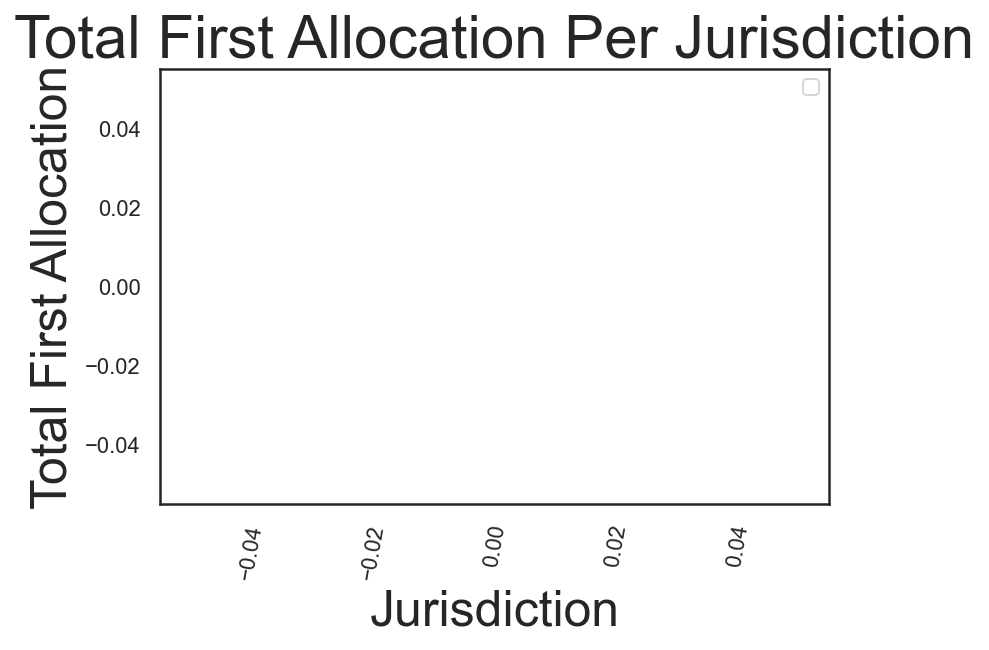

In [92]:
sns.set(style='white')

ax1=plt.subplot(111)

#ret=ax1.no_total_al.drop(columns=['2019_population'])[::-1].plot(kind='bar',stacked=True,figsize=(15,6))

ret=ax1.plot(data=no_total_al.drop(columns=['2019_population'])[::-1],
             kind='bar',stacked=True,figsize=(15,6))

plt.ticklabel_format(style='plain',axis='y')
plt.xlabel("Jurisdiction",size=25)
plt.ylabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30)
plt.legend(fontsize=10,loc='best')
plt.xticks(rotation=80)


#for pY,pX in enumerate(no_total_al['2019_population']):

;

In [90]:
for pY,pX in enumerate(no_total_al['2019_population']):
    print(pX,pY)

578759 0
623989 1
705749 2
762062 3
884659 4
973764 5
1068778 6
1059361 7
731545 8
1344212 9
1359711 10
1415872 11
1787065 12
1934408 13
1792147 14
2096829 15
3205958 16
2913314 17
3080156 18
2976149 19
3017804 20
3155070 21
3193694 22
3565287 23
3956971 24
4217737 25
4467673 26
4648794 27
4903185 28
5148714 29
5639632 30
5758736 31
5822434 32
6045680 33
6137428 34
6732219 35
6829174 36
7278717 37
6892503 38
7614893 39
8535519 40
8882190 41
9986857 42
10617423 43
10488084 44
11689100 45
12671821 46
12801989 47
19453561 48
21477737 49
28995881 50
39512223 51
